In [1]:
from lightexperiments.light import Light
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sbn
%matplotlib inline
light = Light()
light.launch()

d = light.db.find({"tags": "variational_autoencoder_example"})
documents = list(d)

light.close()

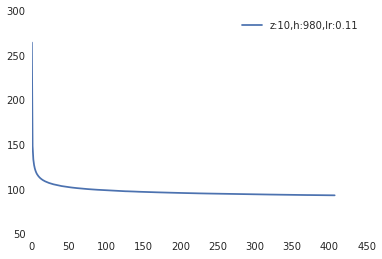

In [2]:
plt.clf()
i = 0
#print documents[0]["loss_train"][-1]
sampled_documents = np.random.choice(documents, min(len(documents), 5), replace=False)
sampled_documents = documents[0:1]
for document in sampled_documents:
    #if(document['loss_train'][-1] > 110):
    #    continue
    if np.nan in document['loss_train']:
        continue
    plt.plot(document['epoch'], document['loss_train'], label="z:{0},h:{1},lr:{2:.2f}".format(document['z_dim'], 
                                                                                              document['hidden'],                                                                                              document['learning_rate']*10**3))
    #print(document.keys())
    plt.grid(True)
plt.legend(loc='best')

In [3]:
print(documents[0]["code_"])


import matplotlib as mpl
mpl.use('Agg')
import numpy as np
from lasagne.generative import va
from lasagne.easy import (BatchOptimizer, LightweightModel,
                          get_2d_square_image_view)
from lasagne.layers.batch_norm import batch_norm
from lasagne.misc.plot_weights import grid_plot
from lasagne import layers, nonlinearities, updates, init
from sklearn.datasets import load_digits
from lasagne.datasets.mnist import MNIST
from lasagne.datasets.faces import Faces
import theano
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import theano

import matplotlib.pyplot as plt

from theano.sandbox import rng_mrg

if __name__ == "__main__":
    from lightexperiments.light import Light
    light = Light()
    light.launch() # init the DB
    light.initials() # save the date and init the timer

    light.file_snapshot() # save the content of the python file runni

In [7]:
import pandas as pd
cols_names = [  'z_dim', 'hidden', 'learning_rate', 'loss_train_final', 'duration', 
        'max_epochs', 'batch_size',
        'batch_normalization',
        'sec/epoch']
cols_values = [
    'z_dim', 'hidden', 'learning_rate', lambda d:d["loss_train"][-1], 'duration', 
    'max_epochs', 'batch_size',
    'batch_normalization',
    'duration',
    lambda d:(d['duration']/(d['max_epochs']))
]
    
df = pd.DataFrame(columns=cols_names)
for name, col in zip(cols_names, cols_values):
    if type(col) == str:
        df[name] = [d[col] for d in documents]
    elif callable(col):
        df[name] = [col(d) for d in documents]
        
df = df.sort('loss_train_final')
df[0:50]

,z_dim,hidden,learning_rate,loss_train_final,duration,max_epochs,batch_size,batch_normalization,sec/epoch
168,180,990,0.000210,93.557022,359.342853,300,256,False,359.342853
0,10,980,0.000112,94.217857,1444.650298,408,512,False,1444.650298
5,100,1045,0.000234,94.285980,1473.040571,242,128,False,1473.040571
3,160,1031,0.000441,94.308983,1075.523649,179,200,False,1075.523649
129,160,838,0.000304,95.055443,367.404968,300,256,False,367.404968
9,30,434,0.000488,95.281204,937.973756,466,500,True,937.973756
162,20,591,0.000520,95.774971,188.015571,300,256,False,188.015571
25,80,596,0.000149,96.433929,943.193688,362,500,True,943.193688
131,120,755,0.000896,96.672455,292.512025,300,256,False,292.512025
12,80,681,0.000932,96.820915,482.243987,92,200,True,482.243987


In [5]:
print(df.loc[0, :])

z_dim                           10
hidden                         980
learning_rate          0.000112147
loss_train_final          94.21786
duration                   1444.65
max_epochs                     408
batch_size                     512
batch_normalization          False
sec/epoch                  3.54081
Name: 0, dtype: object


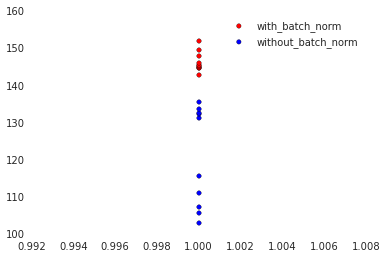

In [13]:
# compare batch normalization vs no batch normalization
documents_ = [doc for doc in documents if "hyperparamer_optimization_for_zdim_2" in doc["tags"]]
plt.clf()
doc_with_batch_norm = [doc for doc in documents_ if doc.get("batch_normalization", False) is True]
doc_without_batch_norm = [doc for doc in documents_ if doc.get("batch_normalization", False) is False]

nb_samples = 10
doc_without_batch_norm = sorted(doc_without_batch_norm, key=lambda d:d["loss_train"][-1])
doc_without_batch_norm = doc_without_batch_norm[0:nb_samples]
    
doc_with_batch_norm = sorted(doc_with_batch_norm, key=lambda d:d["loss_train"][-1])
doc_with_batch_norm = doc_with_batch_norm[0:nb_samples]

#for d in doc_with_batch_norm:

plt.scatter([1]*len(doc_with_batch_norm), [d['loss_train'][-1] for d in doc_with_batch_norm], c='red', label='with_batch_norm')
plt.scatter([1]*len(doc_without_batch_norm), [d['loss_train'][-1] for d in doc_without_batch_norm], c='blue', label='without_batch_norm')

#plt.scatter(d['epoch'], d['loss_train'], label="with_batch_norm", linewidth=2,c='red', alpha=0.5)
#for d in doc_without_batch_norm:
#    plt.plot(d['epoch'], d['loss_train'], label="without_batch_norm", linewidth=2, c='blue', alpha=0.5)
    
plt.legend(loc='best')

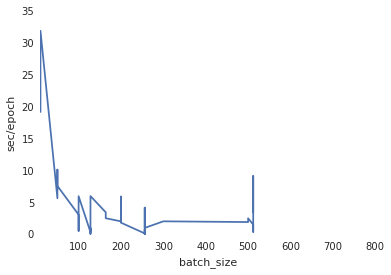

In [14]:
# influence of batch size on learning
df_ = df.sort("batch_size")
plt.plot(df_["batch_size"], (df_["sec/epoch"]))
plt.xlim(xmin=10, xmax=800)
plt.xlabel('batch_size')
plt.ylabel('sec/epoch')